# **Pre-processing Data using Pandas**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Import Libraries

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from IPython.display import clear_output

import requests
import numpy as np
import pandas as pd
import re
import time
import seaborn as sns
import matplotlib.pyplot as plt

from tqdm import tqdm

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)
pd.options.display.max_rows

sns.set()

## Read Dataset

In [3]:
PATH = '/content/drive/MyDrive/DataSet/'

### Data tháng 3/2024

In [4]:
df1 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2024_3.csv')
df1.head()
df1.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N176PQ,4816,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,625,618.0,-7.0,0.0,0.0,-1.0,0600-0659,12.0,630.0,817.0,11.0,849,828.0,-21.0,0.0,0.0,-2.0,0800-0859,0.0,0.0,144.0,130.0,107.0,1.0,833.0,4,0
1,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N182GJ,4989,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,1918,1916.0,-2.0,0.0,0.0,-1.0,1900-1959,13.0,1929.0,2115.0,8.0,2144,2123.0,-21.0,0.0,0.0,-2.0,2100-2159,0.0,0.0,146.0,127.0,106.0,1.0,833.0,4,0
2,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N182GJ,4989,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,1549,1609.0,20.0,20.0,1.0,1.0,1500-1559,20.0,1629.0,1834.0,4.0,1834,1838.0,4.0,4.0,0.0,0.0,1800-1859,0.0,0.0,165.0,149.0,125.0,1.0,833.0,4,0
3,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N294PQ,5423,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,15249,1524906,35249,TLH,"Tallahassee, FL",FL,12,Florida,33,1657,1654.0,-3.0,0.0,0.0,-1.0,1600-1659,13.0,1707.0,1750.0,5.0,1802,1755.0,-7.0,0.0,0.0,-1.0,1800-1859,0.0,0.0,65.0,61.0,43.0,1.0,223.0,1,0
4,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N294PQ,5423,15249,1524906,35249,TLH,"Tallahassee, FL",FL,12,Florida,33,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1842,1837.0,-5.0,0.0,0.0,-1.0,1800-1859,39.0,1916.0,2003.0,15.0,1958,2018.0,20.0,20.0,1.0,1.0,1900-1959,0.0,0.0,76.0,101.0,47.0,1.0,223.0,1,0


(122957, 56)

### Data tháng 6/2024

In [5]:
df2 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2024_6.csv')
df2.head()
df2.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2024,2,6,1,6,6/1/2024 12:00:00 AM,9E,20363,9E,N228PQ,4945,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,1818,1815.0,-3.0,0.0,0.0,-1.0,1800-1859,16.0,1831.0,2030.0,9.0,2052,2039.0,-13.0,0.0,0.0,-1.0,2000-2059,0.0,0.0,154.0,144.0,119.0,1.0,828.0,4,0
1,2024,2,6,1,6,6/1/2024 12:00:00 AM,9E,20363,9E,N228PQ,4945,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,1459,1501.0,2.0,2.0,0.0,0.0,1400-1459,16.0,1517.0,1714.0,4.0,1738,1718.0,-20.0,0.0,0.0,-2.0,1700-1759,0.0,0.0,159.0,137.0,117.0,1.0,828.0,4,0
2,2024,2,6,1,6,6/1/2024 12:00:00 AM,9E,20363,9E,N324PQ,5520,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,1550,1535.0,-15.0,0.0,0.0,-1.0,1500-1559,48.0,1623.0,1817.0,8.0,1831,1825.0,-6.0,0.0,0.0,-1.0,1800-1859,0.0,0.0,161.0,170.0,114.0,1.0,833.0,4,0
3,2024,2,6,1,6,6/1/2024 12:00:00 AM,9E,20363,9E,N330PQ,5341,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,15249,1524906,35249,TLH,"Tallahassee, FL",FL,12,Florida,33,1110,1113.0,3.0,3.0,0.0,0.0,1100-1159,21.0,1134.0,1216.0,2.0,1215,1218.0,3.0,3.0,0.0,0.0,1200-1259,0.0,0.0,65.0,65.0,42.0,1.0,223.0,1,0
4,2024,2,6,1,6,6/1/2024 12:00:00 AM,9E,20363,9E,N330PQ,5341,15249,1524906,35249,TLH,"Tallahassee, FL",FL,12,Florida,33,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1300,1309.0,9.0,9.0,0.0,0.0,1300-1359,10.0,1319.0,1404.0,11.0,1411,1415.0,4.0,4.0,0.0,0.0,1400-1459,0.0,0.0,71.0,66.0,45.0,1.0,223.0,1,0


(98721, 56)

### Data tháng 9/2024

In [6]:
df3 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2024_9.csv')
df3.head()
df3.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2024,3,9,1,7,9/1/2024 12:00:00 AM,9E,20363,9E,N186PQ,4959,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,705,656.0,-9.0,0.0,0.0,-1.0,0700-0759,18.0,714.0,901.0,15.0,930,916.0,-14.0,0.0,0.0,-1.0,0900-0959,0.0,0.0,145.0,140.0,107.0,1.0,828.0,4,0
1,2024,3,9,1,7,9/1/2024 12:00:00 AM,9E,20363,9E,N294PQ,4829,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,1038,1034.0,-4.0,0.0,0.0,-1.0,1000-1059,9.0,1043.0,1235.0,7.0,1259,1242.0,-17.0,0.0,0.0,-2.0,1200-1259,0.0,0.0,141.0,128.0,112.0,1.0,828.0,4,0
2,2024,3,9,1,7,9/1/2024 12:00:00 AM,9E,20363,9E,N294PQ,4968,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,720,715.0,-5.0,0.0,0.0,-1.0,0700-0759,15.0,730.0,926.0,3.0,956,929.0,-27.0,0.0,0.0,-2.0,0900-0959,0.0,0.0,156.0,134.0,116.0,1.0,833.0,4,0
3,2024,3,9,1,7,9/1/2024 12:00:00 AM,9E,20363,9E,N348PQ,5149,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,15249,1524906,35249,TLH,"Tallahassee, FL",FL,12,Florida,33,1540,1538.0,-2.0,0.0,0.0,-1.0,1500-1559,17.0,1555.0,1638.0,4.0,1647,1642.0,-5.0,0.0,0.0,-1.0,1600-1659,0.0,0.0,67.0,64.0,43.0,1.0,223.0,1,0
4,2024,3,9,1,7,9/1/2024 12:00:00 AM,9E,20363,9E,N348PQ,5149,15249,1524906,35249,TLH,"Tallahassee, FL",FL,12,Florida,33,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1730,1727.0,-3.0,0.0,0.0,-1.0,1700-1759,10.0,1737.0,1827.0,16.0,1844,1843.0,-1.0,0.0,0.0,-1.0,1800-1859,0.0,0.0,74.0,76.0,50.0,1.0,223.0,1,0


(81954, 56)

### Data tháng 12/2024

In [7]:
df4 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2024_12.csv')
df4.head()
df4.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2024,4,12,1,7,12/1/2024 12:00:00 AM,9E,20363,9E,N181PQ,5156,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,14193,1419306,33728,PNS,"Pensacola, FL",FL,12,Florida,33,930,921.0,-9.0,0.0,0.0,-1.0,0900-0959,39.0,1000.0,1136.0,4.0,1142,1140.0,-2.0,0.0,0.0,-1.0,1100-1159,0.0,0.0,192.0,199.0,156.0,1.0,1030.0,5,0
1,2024,4,12,1,7,12/1/2024 12:00:00 AM,9E,20363,9E,N181PQ,5434,14193,1419306,33728,PNS,"Pensacola, FL",FL,12,Florida,33,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,1222,1227.0,5.0,5.0,0.0,0.0,1200-1259,15.0,1242.0,1543.0,16.0,1559,1559.0,0.0,0.0,0.0,0.0,1500-1559,0.0,0.0,157.0,152.0,121.0,1.0,1030.0,5,0
2,2024,4,12,1,7,12/1/2024 12:00:00 AM,9E,20363,9E,N605LR,4824,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,1209,1307.0,58.0,58.0,1.0,3.0,1200-1259,18.0,1325.0,1512.0,7.0,1430,1519.0,49.0,49.0,1.0,3.0,1400-1459,0.0,0.0,141.0,132.0,107.0,1.0,828.0,4,0
3,2024,4,12,1,7,12/1/2024 12:00:00 AM,9E,20363,9E,N605LR,4968,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,844,919.0,35.0,35.0,1.0,2.0,0800-0859,38.0,957.0,1214.0,4.0,1129,1218.0,49.0,49.0,1.0,3.0,1100-1159,0.0,0.0,165.0,179.0,137.0,1.0,833.0,4,0
4,2024,4,12,1,7,12/1/2024 12:00:00 AM,9E,20363,9E,N909XJ,4959,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,12478,1247805,31703,JFK,"New York, NY",NY,36,New York,22,740,807.0,27.0,27.0,1.0,1.0,0700-0759,25.0,832.0,1016.0,13.0,1001,1029.0,28.0,28.0,1.0,1.0,1000-1059,0.0,0.0,141.0,142.0,104.0,1.0,828.0,4,0


(108961, 56)

### Data tháng 1/2025

In [8]:
df5 = pd.read_csv(PATH+'T_ONTIME_REPORTING_2025_1.csv')
df5.head()
df5.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2025,1,1,1,3,1/1/2025 12:00:00 AM,AA,19805,AA,N111US,798,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,15304,1530402,33195,TPA,"Tampa, FL",FL,12,Florida,33,1221,1216.0,-5.0,0.0,0.0,-1.0,1200-1259,30.0,1246.0,1406.0,3.0,1405,1409.0,4.0,4.0,0.0,0.0,1400-1459,0.0,0.0,104.0,113.0,80.0,1.0,507.0,3,0
1,2025,1,1,1,3,1/1/2025 12:00:00 AM,AA,19805,AA,N111US,798,15304,1530402,33195,TPA,"Tampa, FL",FL,12,Florida,33,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1458,1459.0,1.0,1.0,0.0,0.0,1400-1459,9.0,1508.0,1614.0,45.0,1645,1659.0,14.0,14.0,0.0,0.0,1600-1659,0.0,0.0,107.0,120.0,66.0,1.0,507.0,3,0
2,2025,1,1,1,3,1/1/2025 12:00:00 AM,AA,19805,AA,N117UW,1452,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,14986,1498603,34986,SRQ,"Sarasota/Bradenton, FL",FL,12,Florida,33,1100,1106.0,6.0,6.0,0.0,0.0,1100-1159,13.0,1119.0,1242.0,4.0,1251,1246.0,-5.0,0.0,0.0,-1.0,1200-1259,0.0,0.0,111.0,100.0,83.0,1.0,547.0,3,0
3,2025,1,1,1,3,1/1/2025 12:00:00 AM,AA,19805,AA,N117UW,465,14986,1498603,34986,SRQ,"Sarasota/Bradenton, FL",FL,12,Florida,33,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1341,1335.0,-6.0,0.0,0.0,-1.0,1300-1359,24.0,1359.0,1511.0,5.0,1537,1516.0,-21.0,0.0,0.0,-2.0,1500-1559,0.0,0.0,116.0,101.0,72.0,1.0,547.0,3,0
4,2025,1,1,1,3,1/1/2025 12:00:00 AM,AA,19805,AA,N119NN,844,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,15304,1530402,33195,TPA,"Tampa, FL",FL,12,Florida,33,1707,1702.0,-5.0,0.0,0.0,-1.0,1700-1759,13.0,1715.0,2009.0,19.0,2027,2028.0,1.0,1.0,0.0,0.0,2000-2059,0.0,0.0,140.0,146.0,114.0,1.0,929.0,4,0


(104375, 56)

### Create train/test/stream data

#### Train/test data

In [9]:
data = pd.concat([df1,df2,df3,df4])
data.head()
data.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N176PQ,4816,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,625,618.0,-7.0,0.0,0.0,-1.0,0600-0659,12.0,630.0,817.0,11.0,849,828.0,-21.0,0.0,0.0,-2.0,0800-0859,0.0,0.0,144.0,130.0,107.0,1.0,833.0,4,0
1,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N182GJ,4989,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,1918,1916.0,-2.0,0.0,0.0,-1.0,1900-1959,13.0,1929.0,2115.0,8.0,2144,2123.0,-21.0,0.0,0.0,-2.0,2100-2159,0.0,0.0,146.0,127.0,106.0,1.0,833.0,4,0
2,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N182GJ,4989,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,1549,1609.0,20.0,20.0,1.0,1.0,1500-1559,20.0,1629.0,1834.0,4.0,1834,1838.0,4.0,4.0,0.0,0.0,1800-1859,0.0,0.0,165.0,149.0,125.0,1.0,833.0,4,0
3,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N294PQ,5423,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,15249,1524906,35249,TLH,"Tallahassee, FL",FL,12,Florida,33,1657,1654.0,-3.0,0.0,0.0,-1.0,1600-1659,13.0,1707.0,1750.0,5.0,1802,1755.0,-7.0,0.0,0.0,-1.0,1800-1859,0.0,0.0,65.0,61.0,43.0,1.0,223.0,1,0
4,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N294PQ,5423,15249,1524906,35249,TLH,"Tallahassee, FL",FL,12,Florida,33,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1842,1837.0,-5.0,0.0,0.0,-1.0,1800-1859,39.0,1916.0,2003.0,15.0,1958,2018.0,20.0,20.0,1.0,1.0,1900-1959,0.0,0.0,76.0,101.0,47.0,1.0,223.0,1,0


(412593, 56)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 412593 entries, 0 to 108960
Data columns (total 56 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   412593 non-null  int64  
 1   QUARTER                412593 non-null  int64  
 2   MONTH                  412593 non-null  int64  
 3   DAY_OF_MONTH           412593 non-null  int64  
 4   DAY_OF_WEEK            412593 non-null  int64  
 5   FL_DATE                412593 non-null  object 
 6   OP_UNIQUE_CARRIER      412593 non-null  object 
 7   OP_CARRIER_AIRLINE_ID  412593 non-null  int64  
 8   OP_CARRIER             412593 non-null  object 
 9   TAIL_NUM               411264 non-null  object 
 10  OP_CARRIER_FL_NUM      412593 non-null  int64  
 11  ORIGIN_AIRPORT_ID      412593 non-null  int64  
 12  ORIGIN_AIRPORT_SEQ_ID  412593 non-null  int64  
 13  ORIGIN_CITY_MARKET_ID  412593 non-null  int64  
 14  ORIGIN                 412593 non-null  o

In [11]:
data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
YEAR,412593.0,NaN,NaN,NaN,2024.0,0.0,2024.0,2024.0,2024.0,2024.0,2024.0
QUARTER,412593.0,NaN,NaN,NaN,2.428798,1.170099,1.0,1.0,2.0,4.0,4.0
MONTH,412593.0,NaN,NaN,NaN,7.286394,3.510296,3.0,3.0,6.0,12.0,12.0
DAY_OF_MONTH,412593.0,NaN,NaN,NaN,15.998839,8.869546,1.0,8.0,16.0,24.0,31.0
DAY_OF_WEEK,412593.0,NaN,NaN,NaN,4.149324,2.06736,1.0,2.0,4.0,6.0,7.0
FL_DATE,412593,122,3/23/2024 12:00:00 AM,4382,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OP_UNIQUE_CARRIER,412593,14,AA,78551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OP_CARRIER_AIRLINE_ID,412593.0,NaN,NaN,NaN,19964.031188,379.461845,19393.0,19790.0,19805.0,20409.0,20452.0
OP_CARRIER,412593,14,AA,78551,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TAIL_NUM,411264,5248,N535NK,382,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Stream data

In [12]:
stream_data = df5
stream_data.head()
stream_data.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2025,1,1,1,3,1/1/2025 12:00:00 AM,AA,19805,AA,N111US,798,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,15304,1530402,33195,TPA,"Tampa, FL",FL,12,Florida,33,1221,1216.0,-5.0,0.0,0.0,-1.0,1200-1259,30.0,1246.0,1406.0,3.0,1405,1409.0,4.0,4.0,0.0,0.0,1400-1459,0.0,0.0,104.0,113.0,80.0,1.0,507.0,3,0
1,2025,1,1,1,3,1/1/2025 12:00:00 AM,AA,19805,AA,N111US,798,15304,1530402,33195,TPA,"Tampa, FL",FL,12,Florida,33,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1458,1459.0,1.0,1.0,0.0,0.0,1400-1459,9.0,1508.0,1614.0,45.0,1645,1659.0,14.0,14.0,0.0,0.0,1600-1659,0.0,0.0,107.0,120.0,66.0,1.0,507.0,3,0
2,2025,1,1,1,3,1/1/2025 12:00:00 AM,AA,19805,AA,N117UW,1452,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,14986,1498603,34986,SRQ,"Sarasota/Bradenton, FL",FL,12,Florida,33,1100,1106.0,6.0,6.0,0.0,0.0,1100-1159,13.0,1119.0,1242.0,4.0,1251,1246.0,-5.0,0.0,0.0,-1.0,1200-1259,0.0,0.0,111.0,100.0,83.0,1.0,547.0,3,0
3,2025,1,1,1,3,1/1/2025 12:00:00 AM,AA,19805,AA,N117UW,465,14986,1498603,34986,SRQ,"Sarasota/Bradenton, FL",FL,12,Florida,33,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1341,1335.0,-6.0,0.0,0.0,-1.0,1300-1359,24.0,1359.0,1511.0,5.0,1537,1516.0,-21.0,0.0,0.0,-2.0,1500-1559,0.0,0.0,116.0,101.0,72.0,1.0,547.0,3,0
4,2025,1,1,1,3,1/1/2025 12:00:00 AM,AA,19805,AA,N119NN,844,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,15304,1530402,33195,TPA,"Tampa, FL",FL,12,Florida,33,1707,1702.0,-5.0,0.0,0.0,-1.0,1700-1759,13.0,1715.0,2009.0,19.0,2027,2028.0,1.0,1.0,0.0,0.0,2000-2059,0.0,0.0,140.0,146.0,114.0,1.0,929.0,4,0


(104375, 56)

In [13]:
stream_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104375 entries, 0 to 104374
Data columns (total 56 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   YEAR                   104375 non-null  int64  
 1   QUARTER                104375 non-null  int64  
 2   MONTH                  104375 non-null  int64  
 3   DAY_OF_MONTH           104375 non-null  int64  
 4   DAY_OF_WEEK            104375 non-null  int64  
 5   FL_DATE                104375 non-null  object 
 6   OP_UNIQUE_CARRIER      104375 non-null  object 
 7   OP_CARRIER_AIRLINE_ID  104375 non-null  int64  
 8   OP_CARRIER             104375 non-null  object 
 9   TAIL_NUM               104001 non-null  object 
 10  OP_CARRIER_FL_NUM      104375 non-null  int64  
 11  ORIGIN_AIRPORT_ID      104375 non-null  int64  
 12  ORIGIN_AIRPORT_SEQ_ID  104375 non-null  int64  
 13  ORIGIN_CITY_MARKET_ID  104375 non-null  int64  
 14  ORIGIN                 104375 non-nu

In [14]:
stream_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
YEAR,104375.0,NaN,NaN,NaN,2025.0,0.0,2025.0,2025.0,2025.0,2025.0,2025.0
QUARTER,104375.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
MONTH,104375.0,NaN,NaN,NaN,1.0,0.0,1.0,1.0,1.0,1.0,1.0
DAY_OF_MONTH,104375.0,NaN,NaN,NaN,15.656584,9.08718,1.0,8.0,16.0,24.0,31.0
DAY_OF_WEEK,104375.0,NaN,NaN,NaN,4.082922,1.934103,1.0,3.0,4.0,6.0,7.0
FL_DATE,104375,31,1/4/2025 12:00:00 AM,4077,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OP_UNIQUE_CARRIER,104375,13,AA,20881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OP_CARRIER_AIRLINE_ID,104375.0,NaN,NaN,NaN,19976.321926,370.268726,19393.0,19790.0,19805.0,20409.0,20452.0
OP_CARRIER,104375,13,AA,20881,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TAIL_NUM,104001,4526,814NV,156,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Preprocessing data

### Check missing values

#### Train/test data

In [15]:
# Kiểm tra xem có dữ liệu nào bị thiếu không
def Check_missing(df):
  total = df.isnull().sum().sort_values(ascending = False)
  percent = round((df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False),3)
  df_missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
  df_missing_data
  print('Số lượng feature bị khuyết giá trị là: {} feature'.format(len(df_missing_data[df_missing_data['Total']>0])))
  print(f'Shape = {df.shape}')
  return df_missing_data

In [16]:
Check_missing(data)

Số lượng feature bị khuyết giá trị là: 17 feature
Shape = (412593, 56)


,Total,Percent
ACTUAL_ELAPSED_TIME,7331,1.777
AIR_TIME,7331,1.777
ARR_DELAY_NEW,7331,1.777
ARR_DELAY,7331,1.777
ARR_DELAY_GROUP,7331,1.777
ARR_DEL15,7331,1.777
WHEELS_ON,6132,1.486
TAXI_IN,6132,1.486
ARR_TIME,6132,1.486
WHEELS_OFF,6016,1.458


In [17]:
# Xóa các dòng bị missing values khỏi tập dữ liệu
data.dropna(inplace=True)

In [18]:
Check_missing(data)

Số lượng feature bị khuyết giá trị là: 0 feature
Shape = (405262, 56)


,Total,Percent
YEAR,0,0.0
QUARTER,0,0.0
MONTH,0,0.0
DAY_OF_MONTH,0,0.0
DAY_OF_WEEK,0,0.0
FL_DATE,0,0.0
OP_UNIQUE_CARRIER,0,0.0
OP_CARRIER_AIRLINE_ID,0,0.0
OP_CARRIER,0,0.0
TAIL_NUM,0,0.0


In [19]:
data.head()
data.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N176PQ,4816,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,625,618.0,-7.0,0.0,0.0,-1.0,0600-0659,12.0,630.0,817.0,11.0,849,828.0,-21.0,0.0,0.0,-2.0,0800-0859,0.0,0.0,144.0,130.0,107.0,1.0,833.0,4,0
1,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N182GJ,4989,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,1918,1916.0,-2.0,0.0,0.0,-1.0,1900-1959,13.0,1929.0,2115.0,8.0,2144,2123.0,-21.0,0.0,0.0,-2.0,2100-2159,0.0,0.0,146.0,127.0,106.0,1.0,833.0,4,0
2,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N182GJ,4989,12953,1295304,31703,LGA,"New York, NY",NY,36,New York,22,12451,1245102,31136,JAX,"Jacksonville, FL",FL,12,Florida,33,1549,1609.0,20.0,20.0,1.0,1.0,1500-1559,20.0,1629.0,1834.0,4.0,1834,1838.0,4.0,4.0,0.0,0.0,1800-1859,0.0,0.0,165.0,149.0,125.0,1.0,833.0,4,0
3,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N294PQ,5423,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,15249,1524906,35249,TLH,"Tallahassee, FL",FL,12,Florida,33,1657,1654.0,-3.0,0.0,0.0,-1.0,1600-1659,13.0,1707.0,1750.0,5.0,1802,1755.0,-7.0,0.0,0.0,-1.0,1800-1859,0.0,0.0,65.0,61.0,43.0,1.0,223.0,1,0
4,2024,1,3,1,5,3/1/2024 12:00:00 AM,9E,20363,9E,N294PQ,5423,15249,1524906,35249,TLH,"Tallahassee, FL",FL,12,Florida,33,10397,1039707,30397,ATL,"Atlanta, GA",GA,13,Georgia,34,1842,1837.0,-5.0,0.0,0.0,-1.0,1800-1859,39.0,1916.0,2003.0,15.0,1958,2018.0,20.0,20.0,1.0,1.0,1900-1959,0.0,0.0,76.0,101.0,47.0,1.0,223.0,1,0


(405262, 56)

#### Stream data

In [20]:
Check_missing(stream_data)

Số lượng feature bị khuyết giá trị là: 17 feature
Shape = (104375, 56)


,Total,Percent
ACTUAL_ELAPSED_TIME,2702,2.589
AIR_TIME,2702,2.589
ARR_DELAY_NEW,2702,2.589
ARR_DELAY,2702,2.589
ARR_DELAY_GROUP,2702,2.589
ARR_DEL15,2702,2.589
WHEELS_ON,2550,2.443
TAXI_IN,2550,2.443
ARR_TIME,2550,2.443
WHEELS_OFF,2522,2.416


In [21]:
# Xóa các dòng bị missing values khỏi tập dữ liệu
stream_data.dropna(inplace=True)

In [22]:
Check_missing(stream_data)

Số lượng feature bị khuyết giá trị là: 0 feature
Shape = (101673, 56)


,Total,Percent
YEAR,0,0.0
QUARTER,0,0.0
MONTH,0,0.0
DAY_OF_MONTH,0,0.0
DAY_OF_WEEK,0,0.0
FL_DATE,0,0.0
OP_UNIQUE_CARRIER,0,0.0
OP_CARRIER_AIRLINE_ID,0,0.0
OP_CARRIER,0,0.0
TAIL_NUM,0,0.0


In [23]:
stream_data.head()
stream_data.shape

,YEAR,QUARTER,MONTH,DAY_OF_MONTH,DAY_OF_WEEK,FL_DATE,OP_UNIQUE_CARRIER,OP_CARRIER_AIRLINE_ID,OP_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN_AIRPORT_ID,ORIGIN_AIRPORT_SEQ_ID,ORIGIN_CITY_MARKET_ID,ORIGIN,ORIGIN_CITY_NAME,ORIGIN_STATE_ABR,ORIGIN_STATE_FIPS,ORIGIN_STATE_NM,ORIGIN_WAC,DEST_AIRPORT_ID,DEST_AIRPORT_SEQ_ID,DEST_CITY_MARKET_ID,DEST,DEST_CITY_NAME,DEST_STATE_ABR,DEST_STATE_FIPS,DEST_STATE_NM,DEST_WAC,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,DEP_DELAY_NEW,DEP_DEL15,DEP_DELAY_GROUP,DEP_TIME_BLK,TAXI_OUT,WHEELS_OFF,WHEELS_ON,TAXI_IN,CRS_ARR_TIME,ARR_TIME,ARR_DELAY,ARR_DELAY_NEW,ARR_DEL15,ARR_DELAY_GROUP,ARR_TIME_BLK,CANCELLED,DIVERTED,CRS_ELAPSED_TIME,ACTUAL_ELAPSED_TIME,AIR_TIME,FLIGHTS,DISTANCE,DISTANCE_GROUP,DIV_AIRPORT_LANDINGS
0,2025,1,1,1,3,1/1/2025 12:00:00 AM,AA,19805,AA,N111US,798,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,15304,1530402,33195,TPA,"Tampa, FL",FL,12,Florida,33,1221,1216.0,-5.0,0.0,0.0,-1.0,1200-1259,30.0,1246.0,1406.0,3.0,1405,1409.0,4.0,4.0,0.0,0.0,1400-1459,0.0,0.0,104.0,113.0,80.0,1.0,507.0,3,0
1,2025,1,1,1,3,1/1/2025 12:00:00 AM,AA,19805,AA,N111US,798,15304,1530402,33195,TPA,"Tampa, FL",FL,12,Florida,33,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1458,1459.0,1.0,1.0,0.0,0.0,1400-1459,9.0,1508.0,1614.0,45.0,1645,1659.0,14.0,14.0,0.0,0.0,1600-1659,0.0,0.0,107.0,120.0,66.0,1.0,507.0,3,0
2,2025,1,1,1,3,1/1/2025 12:00:00 AM,AA,19805,AA,N117UW,1452,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,14986,1498603,34986,SRQ,"Sarasota/Bradenton, FL",FL,12,Florida,33,1100,1106.0,6.0,6.0,0.0,0.0,1100-1159,13.0,1119.0,1242.0,4.0,1251,1246.0,-5.0,0.0,0.0,-1.0,1200-1259,0.0,0.0,111.0,100.0,83.0,1.0,547.0,3,0
3,2025,1,1,1,3,1/1/2025 12:00:00 AM,AA,19805,AA,N117UW,465,14986,1498603,34986,SRQ,"Sarasota/Bradenton, FL",FL,12,Florida,33,11057,1105703,31057,CLT,"Charlotte, NC",NC,37,North Carolina,36,1341,1335.0,-6.0,0.0,0.0,-1.0,1300-1359,24.0,1359.0,1511.0,5.0,1537,1516.0,-21.0,0.0,0.0,-2.0,1500-1559,0.0,0.0,116.0,101.0,72.0,1.0,547.0,3,0
4,2025,1,1,1,3,1/1/2025 12:00:00 AM,AA,19805,AA,N119NN,844,11298,1129806,30194,DFW,"Dallas/Fort Worth, TX",TX,48,Texas,74,15304,1530402,33195,TPA,"Tampa, FL",FL,12,Florida,33,1707,1702.0,-5.0,0.0,0.0,-1.0,1700-1759,13.0,1715.0,2009.0,19.0,2027,2028.0,1.0,1.0,0.0,0.0,2000-2059,0.0,0.0,140.0,146.0,114.0,1.0,929.0,4,0


(101673, 56)

## Save data

In [ ]:
data.to_csv(PATH+'Predict_Flight_Delays_2024_1.csv', index=False)

In [ ]:
stream_data.to_csv(PATH+'Predict_Flight_Delays_2025_01_1.csv', index=False)

# **Pre-processing Data using Spark**

## Import Libraries

In [24]:
%pip install pyspark==3.5.1

In [25]:
from IPython.core.display import display
from pyspark.sql import SparkSession
from pyspark.sql.types import FloatType
from pyspark.sql import functions as f


spark = SparkSession.builder.appName('FinalProject').config("spark.executor.memory","16g").getOrCreate()
spark

## Read Dataset

### Data Train/Test

In [26]:
# Read dataset.csv
dataset = spark.read.csv(PATH+'Predict_Flight_Delays_2024_1.csv', header=True, inferSchema=True)
dataset.printSchema()
dataset.show(20,False)
dataset.count()

root
 |-- YEAR: integer (nullable = true)
 |-- QUARTER: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- FL_DATE: string (nullable = true)
 |-- OP_UNIQUE_CARRIER: string (nullable = true)
 |-- OP_CARRIER_AIRLINE_ID: integer (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- TAIL_NUM: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- ORIGIN_AIRPORT_ID: integer (nullable = true)
 |-- ORIGIN_AIRPORT_SEQ_ID: integer (nullable = true)
 |-- ORIGIN_CITY_MARKET_ID: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- ORIGIN_CITY_NAME: string (nullable = true)
 |-- ORIGIN_STATE_ABR: string (nullable = true)
 |-- ORIGIN_STATE_FIPS: integer (nullable = true)
 |-- ORIGIN_STATE_NM: string (nullable = true)
 |-- ORIGIN_WAC: integer (nullable = true)
 |-- DEST_AIRPORT_ID: integer (nullable = true)
 |-- DEST_AIRPORT_SEQ_ID: integer (nu

405262

### Data Stream

In [27]:
# Read stream.csv
stream = spark.read.csv(PATH+'Predict_Flight_Delays_2025_01_1.csv', header=True, inferSchema=True)
stream.printSchema()
stream.show(20,False)
stream.count()

root
 |-- YEAR: integer (nullable = true)
 |-- QUARTER: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- FL_DATE: string (nullable = true)
 |-- OP_UNIQUE_CARRIER: string (nullable = true)
 |-- OP_CARRIER_AIRLINE_ID: integer (nullable = true)
 |-- OP_CARRIER: string (nullable = true)
 |-- TAIL_NUM: string (nullable = true)
 |-- OP_CARRIER_FL_NUM: integer (nullable = true)
 |-- ORIGIN_AIRPORT_ID: integer (nullable = true)
 |-- ORIGIN_AIRPORT_SEQ_ID: integer (nullable = true)
 |-- ORIGIN_CITY_MARKET_ID: integer (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- ORIGIN_CITY_NAME: string (nullable = true)
 |-- ORIGIN_STATE_ABR: string (nullable = true)
 |-- ORIGIN_STATE_FIPS: integer (nullable = true)
 |-- ORIGIN_STATE_NM: string (nullable = true)
 |-- ORIGIN_WAC: integer (nullable = true)
 |-- DEST_AIRPORT_ID: integer (nullable = true)
 |-- DEST_AIRPORT_SEQ_ID: integer (nu

101673

## Preprocessing data

### Add ID columns

#### Data Train/Test

In [28]:
dataset_new = dataset.withColumn('DATE', f.split('FL_DATE', ' ')[0]).withColumn('ID', f.concat(f.col('DATE'), f.lit('_'),
                                                                                               f.col('OP_UNIQUE_CARRIER'), f.lit('_'),
                                                                                               f.col('ORIGIN'), f.lit('_'),
                                                                                               f.col('DEST'), f.lit('_'),
                                                                                               f.col('OP_CARRIER_FL_NUM')))
dataset_new.show(20,False)

+----+-------+-----+------------+-----------+--------------------+-----------------+---------------------+----------+--------+-----------------+-----------------+---------------------+---------------------+------+----------------------+----------------+-----------------+---------------+----------+---------------+-------------------+-------------------+----+------------------------------+--------------+---------------+--------------+--------+------------+--------+---------+-------------+---------+---------------+------------+--------+----------+---------+-------+------------+--------+---------+-------------+---------+---------------+------------+---------+--------+----------------+-------------------+--------+-------+--------+--------------+--------------------+--------+------------------------+
|YEAR|QUARTER|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|FL_DATE             |OP_UNIQUE_CARRIER|OP_CARRIER_AIRLINE_ID|OP_CARRIER|TAIL_NUM|OP_CARRIER_FL_NUM|ORIGIN_AIRPORT_ID|ORIGIN_AIRPORT_SEQ_ID|ORIGIN_CIT

In [29]:
TrainTest = dataset_new.select('ID', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
                      'ORIGIN', 'DEST', 'DISTANCE', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'ARR_DEL15')
TrainTest.printSchema()
TrainTest.show(20,False)
TrainTest.count()

root
 |-- ID: string (nullable = true)
 |-- QUARTER: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_UNIQUE_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_TIME: double (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- DEP_DELAY_NEW: double (nullable = true)
 |-- DEP_DEL15: double (nullable = true)
 |-- ARR_DEL15: double (nullable = true)

+------------------------+-------+-----+------------+-----------+-----------------+------+----+--------+------------+--------+---------+-------------+---------+---------+
|ID                      |QUARTER|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|OP_UNIQUE_CARRIER|ORIGIN|DEST|DISTANCE|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|DEP_DELAY_NEW|DEP_DEL15|ARR_DEL15|
+------------------------+-------+-

405262

#### Data Stream

In [30]:
stream_new = stream.withColumn('DATE', f.split('FL_DATE', ' ')[0]).withColumn('ID', f.concat(f.col('DATE'), f.lit('_'),
                                                                                               f.col('OP_UNIQUE_CARRIER'), f.lit('_'),
                                                                                               f.col('ORIGIN'), f.lit('_'),
                                                                                               f.col('DEST'), f.lit('_'),
                                                                                               f.col('OP_CARRIER_FL_NUM')))
stream_new.show(20,False)

+----+-------+-----+------------+-----------+--------------------+-----------------+---------------------+----------+--------+-----------------+-----------------+---------------------+---------------------+------+------------------------------+----------------+-----------------+---------------+----------+---------------+-------------------+-------------------+----+------------------------------+--------------+---------------+--------------+--------+------------+--------+---------+-------------+---------+---------------+------------+--------+----------+---------+-------+------------+--------+---------+-------------+---------+---------------+------------+---------+--------+----------------+-------------------+--------+-------+--------+--------------+--------------------+--------+------------------------+
|YEAR|QUARTER|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|FL_DATE             |OP_UNIQUE_CARRIER|OP_CARRIER_AIRLINE_ID|OP_CARRIER|TAIL_NUM|OP_CARRIER_FL_NUM|ORIGIN_AIRPORT_ID|ORIGIN_AIRPORT_SEQ_ID|OR

In [31]:
Stream = stream_new.select('ID', 'QUARTER', 'MONTH', 'DAY_OF_MONTH', 'DAY_OF_WEEK', 'OP_UNIQUE_CARRIER',
                      'ORIGIN', 'DEST', 'DISTANCE', 'CRS_DEP_TIME', 'DEP_TIME', 'DEP_DELAY', 'DEP_DELAY_NEW', 'DEP_DEL15', 'ARR_DEL15')
Stream.printSchema()
Stream.show(20,False)
Stream.count()

root
 |-- ID: string (nullable = true)
 |-- QUARTER: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_UNIQUE_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_TIME: double (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- DEP_DELAY_NEW: double (nullable = true)
 |-- DEP_DEL15: double (nullable = true)
 |-- ARR_DEL15: double (nullable = true)

+------------------------+-------+-----+------------+-----------+-----------------+------+----+--------+------------+--------+---------+-------------+---------+---------+
|ID                      |QUARTER|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|OP_UNIQUE_CARRIER|ORIGIN|DEST|DISTANCE|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|DEP_DELAY_NEW|DEP_DEL15|ARR_DEL15|
+------------------------+-------+-

101673

### Convert Class

#### Data Train/Test

<Axes: ylabel='Count'>

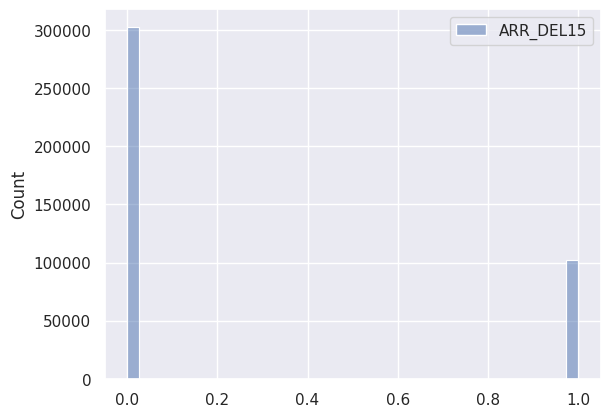

In [32]:
df = TrainTest.select('ARR_DEL15')

sns.histplot(df.toPandas())

In [33]:
TrainTest.select('ARR_DEL15').groupBy('ARR_DEL15').count().show()

+---------+------+
|ARR_DEL15| count|
+---------+------+
|      0.0|302813|
|      1.0|102449|
+---------+------+



#### Data Stream

In [34]:
Stream.printSchema()
Stream.show()

root
 |-- ID: string (nullable = true)
 |-- QUARTER: integer (nullable = true)
 |-- MONTH: integer (nullable = true)
 |-- DAY_OF_MONTH: integer (nullable = true)
 |-- DAY_OF_WEEK: integer (nullable = true)
 |-- OP_UNIQUE_CARRIER: string (nullable = true)
 |-- ORIGIN: string (nullable = true)
 |-- DEST: string (nullable = true)
 |-- DISTANCE: double (nullable = true)
 |-- CRS_DEP_TIME: integer (nullable = true)
 |-- DEP_TIME: double (nullable = true)
 |-- DEP_DELAY: double (nullable = true)
 |-- DEP_DELAY_NEW: double (nullable = true)
 |-- DEP_DEL15: double (nullable = true)
 |-- ARR_DEL15: double (nullable = true)

+--------------------+-------+-----+------------+-----------+-----------------+------+----+--------+------------+--------+---------+-------------+---------+---------+
|                  ID|QUARTER|MONTH|DAY_OF_MONTH|DAY_OF_WEEK|OP_UNIQUE_CARRIER|ORIGIN|DEST|DISTANCE|CRS_DEP_TIME|DEP_TIME|DEP_DELAY|DEP_DELAY_NEW|DEP_DEL15|ARR_DEL15|
+--------------------+-------+-----+-------

<Axes: ylabel='Count'>

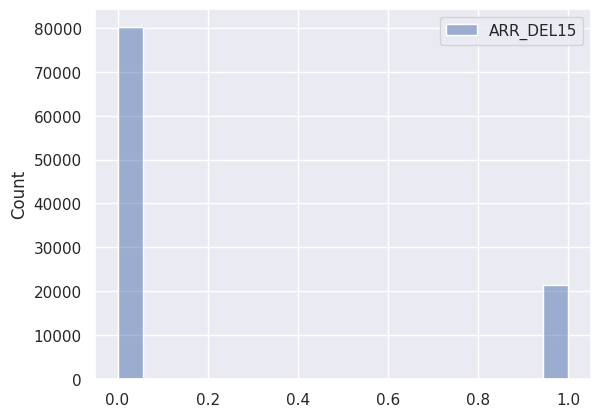

In [35]:
df = Stream.select('ARR_DEL15')

sns.histplot(df.toPandas())

In [38]:
Stream.select('ARR_DEL15').groupBy('ARR_DEL15').count().show()

+---------+-----+
|ARR_DEL15|count|
+---------+-----+
|      0.0|80278|
|      1.0|21395|
+---------+-----+



### Save data

In [ ]:
TrainTest.toPandas().to_csv(PATH+'TrainTest01.csv', index=False)
# TrainTest_new.write.csv(PATH + 'TrainTest_Spark', header=True, mode='overwrite')
# TrainTest_new.coalesce(1).write.csv(PATH + 'TrainTest_SingleFile', header=True, mode='overwrite')

In [ ]:
Stream.toPandas().to_csv(PATH+'Stream01.csv', index=False)